<a href="https://colab.research.google.com/github/JuanAndresRodriguez/TensorFlow-2.0-Complete-Course/blob/main/Core_Learning_Algorithms2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Regression

In [1]:
!pip install -q sklearn

In [2]:
%tensorflow_version 2.x

In [3]:
 from __future__ import absolute_import, division, print_function, unicode_literals

 import numpy as np
 import pandas as pd
 import matplotlib.pyplot as plt
 from IPython.display import clear_output
 from six.moves import urllib

 import tensorflow.compat.v2.feature_column as fc

 import tensorflow as tf

In [4]:
# load dataset

dftrain = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/train.csv')
dfeval = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/eval.csv')
y_train = dftrain.pop('survived')
y_eval = dfeval.pop('survived')

In [5]:
dftrain.head()

,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,female,35.0,1,0,53.1000,First,C,Southampton,n
4,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


In [6]:
y_train

0      0
1      1
2      1
3      1
4      0
      ..
622    0
623    0
624    1
625    0
626    0
Name: survived, Length: 627, dtype: int64

In [7]:
dftrain.shape

(627, 9)

In [8]:
dftrain.describe()

,age,n_siblings_spouses,parch,fare
count,627.000000,627.000000,627.000000,627.000000
mean,29.631308,0.545455,0.379585,34.385399
std,12.511818,1.151090,0.792999,54.597730
min,0.750000,0.000000,0.000000,0.000000
25%,23.000000,0.000000,0.000000,7.895800
50%,28.000000,0.000000,0.000000,15.045800
75%,35.000000,1.000000,0.000000,31.387500
max,80.000000,8.000000,5.000000,512.329200


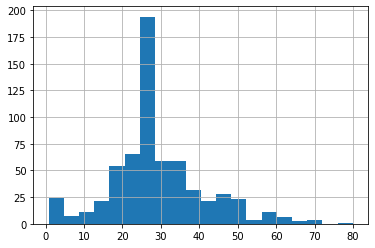

In [9]:
dftrain.age.hist(bins=20)

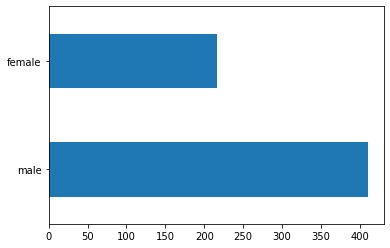

In [10]:
dftrain.sex.value_counts().plot(kind='barh')

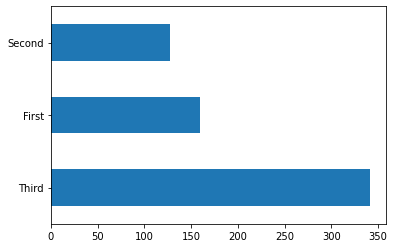

In [11]:
dftrain['class'].value_counts().plot(kind='barh')

Text(0.5, 0, '% survive')

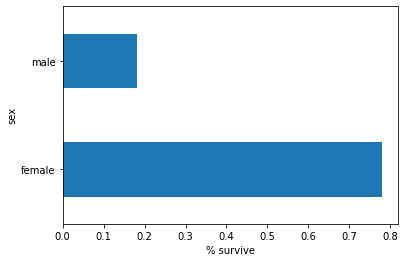

In [12]:
# Percentage of survival by sex
pd.concat([dftrain, y_train], axis=1).groupby('sex').survived.mean().plot(kind='barh').set_xlabel('% survive')

In [13]:
dfeval.shape

(264, 9)

In [14]:
CATEGORICAL_COLUMNS = ['sex', 'n_siblings_spouses', 'parch', 'class', 'deck', 'embark_town', 'alone']

NUMERIC_COLUMNS = ['age', 'fare']

In [15]:
feature_columns = []
for feature_name in CATEGORICAL_COLUMNS:
  vocabulary = dftrain[feature_name].unique() # unique values from feature columns
  feature_columns.append(tf.feature_column.categorical_column_with_vocabulary_list(feature_name, vocabulary))

for feature_name in NUMERIC_COLUMNS:
  feature_columns.append(tf.feature_column.numeric_column(feature_name, dtype=tf.float32))

print(feature_columns)

[VocabularyListCategoricalColumn(key='sex', vocabulary_list=('male', 'female'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='n_siblings_spouses', vocabulary_list=(1, 0, 3, 4, 2, 5, 8), dtype=tf.int64, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='parch', vocabulary_list=(0, 1, 2, 5, 3, 4), dtype=tf.int64, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='class', vocabulary_list=('Third', 'First', 'Second'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='deck', vocabulary_list=('unknown', 'C', 'G', 'A', 'B', 'D', 'F', 'E'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='embark_town', vocabulary_list=('Southampton', 'Cherbourg', 'Queenstown', 'unknown'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='alone', vocabulary_list=('n', 'y'), dtype=tf.string, def

In [16]:
dftrain[feature_name].unique()

array([  7.25  ,  71.2833,   7.925 ,  53.1   ,   8.4583,  21.075 ,
        11.1333,  30.0708,  16.7   ,   8.05  ,  31.275 ,   7.8542,
        29.125 ,  13.    ,  18.    ,   7.225 ,  26.    ,  35.5   ,
        31.3875, 263.    ,   7.8792,   7.8958,  27.7208, 146.5208,
         7.75  ,  10.5   ,  82.1708,  52.    ,   7.2292,  11.2417,
         9.475 ,  21.    ,  41.5792,  15.5   ,  21.6792,  17.8   ,
        39.6875,  76.7292,  61.9792,  46.9   ,  80.    ,  83.475 ,
        27.9   ,  15.2458,   8.1583,   8.6625,  73.5   ,  56.4958,
         7.65  ,  29.    ,  12.475 ,   9.    ,   9.5   ,   7.7875,
        47.1   ,  34.375 ,  61.175 ,  34.6542,  63.3583,  23.    ,
        77.2875,   8.6542,   7.775 ,  24.15  ,  14.4542,  14.4583,
       247.5208,   7.1417,   6.975 ,   7.05  ,  14.5   ,  15.0458,
        26.2833,   9.2167,  79.2   ,   6.75  ,  11.5   ,  12.525 ,
         7.3125,  61.3792,   7.7333,  69.55  ,  16.1   ,  55.    ,
        25.4667,  28.7125,   0.    ,  15.05  ,  22.025 ,  26.5

In [17]:
dftrain['sex'].unique()

array(['male', 'female'], dtype=object)

In [18]:
dftrain['embark_town'].unique()

array(['Southampton', 'Cherbourg', 'Queenstown', 'unknown'], dtype=object)

In [19]:
# Input function
def make_input_fn(data_df, label_df, num_epochs=10, shuffle=True, batch_size=32):
  def input_function(): # inner function, this will be returned
    ds = tf.data.Dataset.from_tensor_slices((dict(data_df), label_df)) # Create tf.data.Dataset object with data and its labels
    if shuffle:
      ds = ds.shuffle(1000) # randomize order of data
    ds = ds.batch(batch_size).repeat(num_epochs) # split dataet into batches of 32 and repeat process for number of epochs
    return ds # return a batch of the dataset
  return input_function # return a function object for use

In [20]:
train_input_fn = make_input_fn(dftrain, y_train)
eval_input_fn = make_input_fn(dfeval, y_eval, num_epochs=1, shuffle=False)

In [21]:
linear_est = tf.estimator.LinearClassifier(feature_columns=feature_columns)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpvug5x7f8', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [22]:
linear_est.train(train_input_fn)

Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.
INFO:tensorflow:Calling model_fn.


/usr/local/lib/python3.7/dist-packages/tensorflow_estimator/python/estimator/canned/linear.py:1478: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  getter=tf.compat.v1.get_variable)


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 0...
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmpvug5x7f8/model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 0...
INFO:tensorflow:loss = 0.6931472, step = 0
INFO:tensorflow:global_step/sec: 175.251
INFO:tensorflow:loss = 0.4468118, step = 100 (0.582 sec)
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 200...
INFO:tensorflow:Saving checkpoints for 200 into /tmp/tmpvug5x7f8/model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 200...
INFO:tensorflow:Loss for final step: 0.3678812.


In [23]:
result = linear_est.evaluate(eval_input_fn)

INFO:tensorflow:Calling model_fn.


/usr/local/lib/python3.7/dist-packages/tensorflow_estimator/python/estimator/canned/linear.py:1478: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  getter=tf.compat.v1.get_variable)


INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2022-06-13T02:34:35
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpvug5x7f8/model.ckpt-200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 1.86156s
INFO:tensorflow:Finished evaluation at 2022-06-13-02:34:37
INFO:tensorflow:Saving dict for global step 200: accuracy = 0.75757575, accuracy_baseline = 0.625, auc = 0.83247626, auc_precision_recall = 0.7804471, average_loss = 0.49624783, global_step = 200, label/mean = 0.375, loss = 0.48747718, precision = 0.721519, prediction/mean = 0.29771394, recall = 0.57575756
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 200: /tmp/tmpvug5x7f8/model.ckpt-200


In [24]:
clear_output() # Para no ver el output

In [25]:
print(result['accuracy'])

0.75757575


In [26]:
print(result)

{'accuracy': 0.75757575, 'accuracy_baseline': 0.625, 'auc': 0.83247626, 'auc_precision_recall': 0.7804471, 'average_loss': 0.49624783, 'label/mean': 0.375, 'loss': 0.48747718, 'precision': 0.721519, 'prediction/mean': 0.29771394, 'recall': 0.57575756, 'global_step': 200}


In [29]:
result = list(linear_est.predict(eval_input_fn))
clear_output()

print(dfeval.loc[0])
print(result[4]['probabilities'][1])

sex                          male
age                          35.0
n_siblings_spouses              0
parch                           0
fare                         8.05
class                       Third
deck                      unknown
embark_town           Southampton
alone                           y
Name: 0, dtype: object
0.16931523
